In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


# shape(2,1)為產生一個shape為2x1的矩陣
# 因為是使用tf.one，所以所有參數的數值為1
# dtype是創建tensor對象的數據類型，這裡是float32。

In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


# shape(2,1)為產生一個shape為2x1的矩陣
# 因為是使用tf.zero，所以所有參數的數值為0

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.3924493 ]
 [ 0.56434816]
 [ 1.2752737 ]], shape=(3, 1), dtype=float32)


# tf.random.normal用來隨機選出常態分布中指定個數的值。
# mean:平均值
# stddev:標準差
# 這裡的3x1矩陣裡的數值會介於-1和1之間。

In [4]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


# 這裡用print(x)可以看到np.ones()產生出的array內的值。
# 用x[0,0]=0. 這是讓(0,0)這個位址的值把它設為0。若少了這行array裡的值都會是1，若把它設成x[0,0]=2.，(0,0)這個位址的值就會被設為2。

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.6535026],
       [ 1.5744619],
       [ 1.495433 ]], dtype=float32)>


# initial_value為初始值
# 讓array裡產生隨機變數

In [6]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

# 透過assign(賦予值)的方式讓array的值都變成tf.ones的值，也就是1。

In [7]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

# 讓array(0,0)的值assign為3。

In [8]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

# tf.assign_add能讓array的值+ tf.ones()的值，也就是+1。所以所有的值從[3,1,1]->[4,2,2]。

In [9]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


# tf.square()能讓陣列裡的值平方，因為array裡的值為1，所以1平方後還是1。
# tf.sqrt()能讓陣列的值取平方根，因為array裡的值為1，所以開根號後還是1。
# tf.matmul() 讓矩陣內的值進行相乘，但要符合矩陣乘法的條件，例:(2x3)(3x2)->(2,2)。在這個例子裡是(2x2)(2x2)->(2x2)，乘出來的是2x2矩陣。
# tf.multiply()與tf.matmul()的差別在於，tf.multiply()是用在兩個array的格式是一樣的才能相乘，例如:(2x3)(2x3)->(2x3)，乘出來的結果是2x3的矩陣。

In [10]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

# tf.GradientTape() :用來計算梯度。
# gradient():用來微分

In [11]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [12]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [13]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# np.random.multivariate_normal():從多元常態分布中隨機抽樣。
# mean: 長度為N的一維數組。
# cov: 協方差矩陣，必須是對角矩陣。
# size:這裡的size=(1000,1000)，也就是1000x1000的矩陣。

In [14]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# np.vstack():從直(上下)的方向將array堆疊起來。

In [15]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

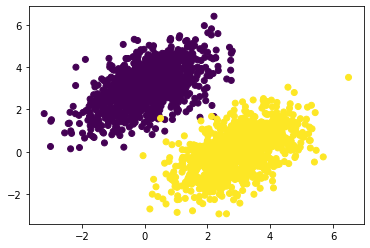

In [16]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# plt.scatter(): 製作散點圖。

In [17]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [19]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# tf.reduce_mean():用來降維(會使用到axis=x，x為任意整數)or計算array裡數值總和的平均值。

In [20]:
learning_rate = 0.075

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [21]:
for step in range(200):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.7926
Loss at step 1: 0.1644
Loss at step 2: 0.1068
Loss at step 3: 0.0981
Loss at step 4: 0.0930
Loss at step 5: 0.0884
Loss at step 6: 0.0842
Loss at step 7: 0.0802
Loss at step 8: 0.0764
Loss at step 9: 0.0729
Loss at step 10: 0.0697
Loss at step 11: 0.0666
Loss at step 12: 0.0638
Loss at step 13: 0.0611
Loss at step 14: 0.0586
Loss at step 15: 0.0563
Loss at step 16: 0.0541
Loss at step 17: 0.0521
Loss at step 18: 0.0502
Loss at step 19: 0.0484
Loss at step 20: 0.0467
Loss at step 21: 0.0452
Loss at step 22: 0.0437
Loss at step 23: 0.0424
Loss at step 24: 0.0411
Loss at step 25: 0.0399
Loss at step 26: 0.0388
Loss at step 27: 0.0378
Loss at step 28: 0.0368
Loss at step 29: 0.0359
Loss at step 30: 0.0350
Loss at step 31: 0.0342
Loss at step 32: 0.0335
Loss at step 33: 0.0328
Loss at step 34: 0.0322
Loss at step 35: 0.0316
Loss at step 36: 0.0310
Loss at step 37: 0.0305
Loss at step 38: 0.0300
Loss at step 39: 0.0295
Loss at step 40: 0.0291
Loss at step 41: 0.0287
Lo

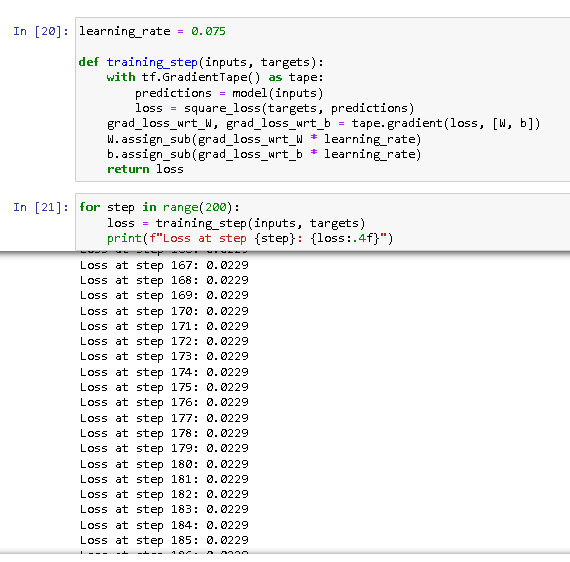
# 這是我目前訓練出來loss最低的

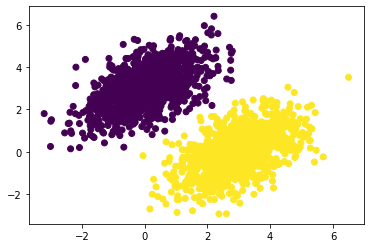

In [22]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

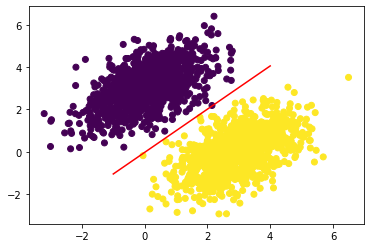

In [23]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [24]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [25]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [26]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [28]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [29]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [30]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [31]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 2.3439 - binary_accuracy: 0.6260
Epoch 2/5
16/16 [==============================] - 0s 999us/step - loss: 2.1162 - binary_accuracy: 0.6385
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 1.9312 - binary_accuracy: 0.6475
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 1.7596 - binary_accuracy: 0.6575
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 1.5974 - binary_accuracy: 0.6705


In [32]:
history.history

{'loss': [2.3438942432403564,
  2.1162426471710205,
  1.93124258518219,
  1.7596465349197388,
  1.5973942279815674],
 'binary_accuracy': [0.6259999871253967,
  0.6384999752044678,
  0.6474999785423279,
  0.6575000286102295,
  0.6704999804496765]}

In [33]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.0855 - binary_accuracy: 0.9607 - val_loss: 0.0281 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0718 - binary_accuracy: 0.9621 - val_loss: 0.0256 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0692 - binary_accuracy: 0.9543 - val_loss: 0.0483 - val_binary_accuracy: 0.9833
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0665 - binary_accuracy: 0.9600 - val_loss: 0.0262 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0689 - binary_accuracy: 0.9536 - val_loss: 0.0504 - val_binary_accuracy: 0.9983


In [34]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[-0.1940175 ]
 [ 0.11926517]
 [-0.02484939]
 [-0.05705824]
 [ 0.07270315]
 [ 1.1223996 ]
 [ 1.2284955 ]
 [ 1.0778188 ]
 [ 0.18061507]
 [-0.18478188]]
